## Задача 2.1
Выборка : https://github.com/andriygav/PSAD/blob/master/labs/lab2/data/2.1.csv

Рассматривается задача тестирования вакцины от некоторого вируса. Производство вакцины очень дорогое и затратное по времени, поэтому в день может быть произведена только одна ампула.

Требуется проверить, что вакцина помогает (вероятность заразиться меньше у человека с вакциной чем у человека без вакцины).

Эксперимент ставится следующим образом: каждый день есть два идентичных по здоровью человека. Один из людей принимает вакцину, а второй нет, после чего обоих ставят в одну среду с вирусом. В конце для проверяют кто заразился. (В таблице: s --- sick; h --- healthy)

Весь мир ждет вакцину от данного вируса, поэтому к руководству института постоянно приходят запросы о сроках завершения тестирования образца. Руководство поручило Вам оценить среднее время, которое понадобится на тестирования данной вакцины. А также провести анализ полученных данных на уровне значимости \alpha=0.05 и при ошибке второго рода beta=0.2.


Требуется:

1. Записать задачу формально;
2. Выполнить оценку среднего количества дней для принятия решения (учесть что истинная вероятность заразиться с вакциной и без равны p_1 = 0.2, p_2 = 0.5 соответственно);
3. Выполнить анализ данных и выяснить работает ли вакцина или нет.

Все выкладки должны быть сделаны аналитически, без использования компьютера.


### Решение

1. Запишем задачу формально. Пусть заданы 2 связные выборки: $X_1^m = (X_{11}, \ldots, X_{1m}), ~ X_1 \sim Ber(p_1), ~X_2^m = (X_{21}, \ldots, X_{2m}), X_2 \sim Ber(p_2)$. Здесь $p_1, p_2$ -- вероятность заболеть. Первая выборка -- наблюдения за невакцинированными, вторая -- за вакцинированными.


Введем относительный риск: $u = \frac{p_1(1 - p_2)}{p_2(1 - p_1)}$. Рассмотрим значение относительного риска при $p_1 = 0.5, p_2 = 0.2 \Rightarrow u = \frac{0.5 * 0.8}{0.2 * 0.5} = 4$.

Пусть $u_L = 1, ~ u_U = 4$


нулевая гипотеза $H_0: u \geq u_U$

альтернатива $H_1: u < u_L$


Статистика: $d_m(X_1^m, X_2^m) = \sum_{i=1}^m(1 - X_{1i})X_{2i}$

Константы последовательного анализа: $a_m = \frac{\ln B + m\ln\frac{1 + u_U}{1 + u_L}}{\ln u_U - \ln u_L}, 
r_m = \frac{\ln A + m\ln \frac{1 + u_U}{1 + u_L}}{\ln u_U - \ln u_L}$, где $A = (1 - \beta)/\alpha, ~B = \beta / (1 - \alpha)$

Решающее правило: отвергаем $H_0$ на шаге $m$, если $d_m \geq r_m$; принимаем $H_0$ на шаге $m$, если $d_m \leq a_m$; иначе добавляем новый элемент выборки.


2. Среднее число шагов до принятия решения:

$$
\mathbb{E}_u(n) = \frac{L(u)\ln B + (1 - L(u))\ln A}{u/(u+1)\ln\frac{u_U(1 + u_L)}{u_L(1+u_U)} + 1/(u+1)\ln\frac{1 + u_L}{1 + u_U}} / (p_1(1 - p_2) + p_2(1 - p_1)),
$$

где $L(u) = \frac{A^h - 1}{A^h - B^h}$, $h = h(u)$ находится из уравнения: $\frac{u}{u+1} = \frac{1 - ((1 + u_L)/(1 + u_U))^h}{[u_U(1 + u_L)/(u_L(1 + u_U))]^h - [(1 + u_L)/(1 + u_U)]^h}$

а) Вычислим среднее число шагов при $u = u_L = 1$. Найдем $h$ из уравнения:

$\frac{1}{2} = \frac{1 - 0.4^h}{1.6^h - 0.4^h} \Rightarrow h = 1 \Rightarrow \boxed{E_{u_L}(n) \approx 12}$

б) Вычислим среднее число шагов при $u = u_U = 4$. Найдем $h$ из уравнения:

$0.8 = \frac{1 - 0.4^h}{1.6^h - 0.4^h} \Rightarrow h = -1 \Rightarrow \boxed{E_{u_U}(n) \approx 20}$

Ниже код с расчетами:


In [1]:
import numpy as np

In [2]:
p_1, p_2 = 0.5, 0.2
u_l, u_u = 1, 4
alpha, beta = 0.05, 0.2
A, B = (1 - beta) / alpha, beta / (1 - alpha)

u_u * (1 + u_l) / u_l / (1 + u_u), (1 + u_l) / (1 + u_u)
h = 1



def mean_steps(u, h):
    L = (A ** h - 1) / (A ** h - B ** h)
    return (L * np.log(B)+(1-L) * np.log(A)) / \
    (u/(u+1) * np.log(u_u*(1+u_l)/(u_l*(1+u_u))) + 1/(1+u)*np.log((1+u_l)/(1+u_u))) /\
    (p_1 * (1 - p_2) + p_2 * (1 - p_1))

u = u_l
print(f'E_u_l(n) = {mean_steps(u_l, 1):.2f}')
print('-' * 20)
print(f'E_u_u(n) = {mean_steps(u_u, -1):.2f}')



E_u_l(n) = 12.02
--------------------
E_u_u(n) = 19.78


3. Выполнить анализ данных и выяснить работает ли вакцина или нет.

Мы принимаем нулевую гипотезу. Следовательно, вакцина работает.

In [3]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/Intelligent-Systems-Phystech/psad/master/labs/lab2/data/2.1.csv')
df.head()

,with vaccine,without vaccine
0,h,h
1,h,s
2,h,s
3,h,h
4,h,h


In [5]:
X = (df == 's').to_numpy().astype(np.float32)
# оставим только различающиеся пары
X = X[X[:, 0] != X[:, 1]]
d = np.cumsum((1 - X[:, 1]) * X[:, 0])

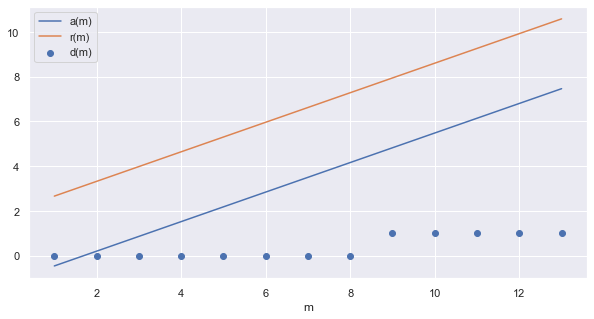

Result: Accept


In [6]:
def a(m: np.array):
    return (np.log(B) + m * np.log((1 + u_u) / (1 + u_l))) / np.log(u_u / u_l)

def r(m: np.array):
    return (np.log(A) + m * np.log((1 + u_u) / (1 + u_l))) / np.log(u_u / u_l)
    

m = np.array(range(1, X.shape[0] + 1))
plt.figure(figsize=(10, 5))
plt.plot(m, a(m), label='a(m)')
plt.plot(m, r(m), label='r(m)')
plt.scatter(m, d, label='d(m)')

plt.xlabel('m')
plt.legend();plt.show()


for a_m, r_m, d_m in zip(a(m), r(m), d):
    if d_m <= a_m:
        print('Result: Accept')
        break
    if d_m >= r_m:
        print('Result: Reject')
        break